In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [9]:
train=pd.read_csv("train.csv",encoding='ISO-8859-1')
test=pd.read_csv("test.csv",encoding='ISO-8859-1')
attributes=pd.read_csv("attributes.csv",encoding='ISO-8859-1')
descriptions=pd.read_csv("product_descriptions.csv",encoding='ISO-8859-1')
#miss=sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')    # NO MISSING DATA 

test.head(5)

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


# SHAPES

In [7]:
print("training data shape is:",train.shape)
print("testing data shape is:",test.shape)
print("attribute data shape is:",attributes.shape)
print("description data shape is:",descriptions.shape)

training data shape is: (74067, 5)
testing data shape is: (166693, 4)
attribute data shape is: (2044803, 3)
description data shape is: (124428, 2)


# MISSING VALUES?


In [8]:
print("training data has empty values:",train.isnull().values.any())
print("testing data has empty values:",test.isnull().values.any())
print("attribute data has empty values:",attributes.isnull().values.any())
print("description data has empty values:",descriptions.isnull().values.any())

   
    

training data has empty values: False
testing data has empty values: False
attribute data has empty values: True
description data has empty values: False


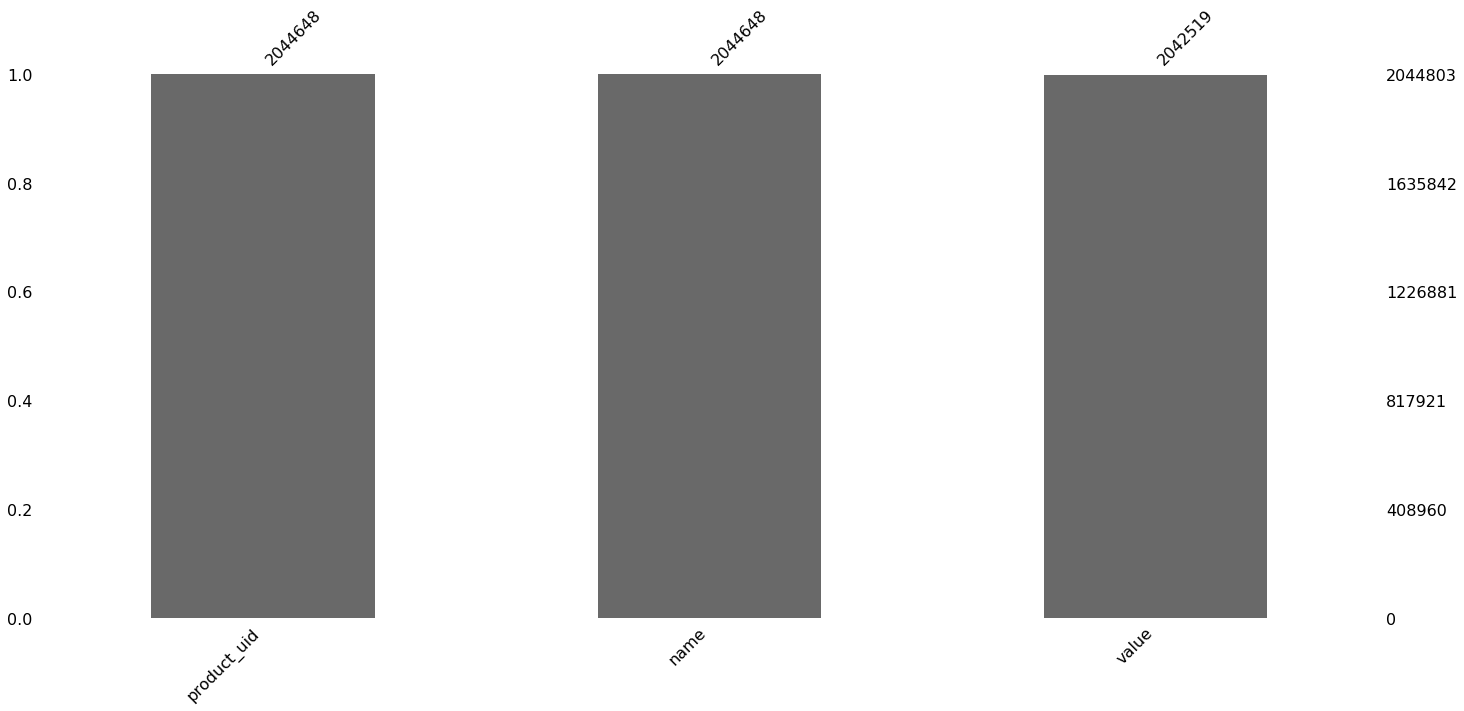

In [9]:
import missingno as msno
msno.bar(attributes, log=False)   ### MISSING VALUES IN ATTRIBUTES VALUES FEATURE

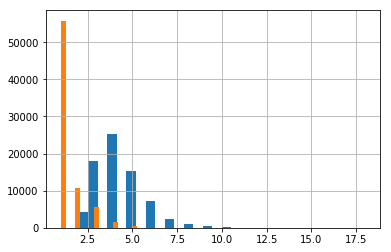

In [11]:
(train.search_term.str.count("\w+") + 1).hist(bins=30)  # number of words
(train.search_term.str.count("\\d+") + 1).hist(bins=30)  # digits 

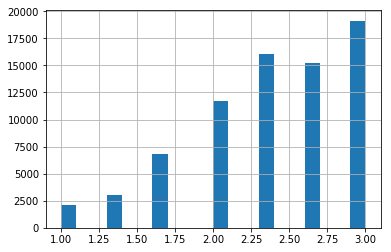

In [12]:
(train.relevance ).hist(bins=20)

In [40]:
print('total data has html tags in',descriptions.product_description.str.count('html').values.sum())

total data has html tags in 0


In [16]:
descriptions[descriptions.product_description.str.contains("physics")]

,product_uid,product_description
15852,115853,Sometimes smaller can be better. And that's th...


In [13]:
descriptions[descriptions.product_description.str.contains("<br$")]


,product_uid,product_description
49,100050,Sit back and relax in comfort and style in the...
246,100247,Choose among several fabric options to coordin...
584,100585,Relax in comfort and style with this Spring Ha...
1247,101248,Relax in comfort and style with this Spring Ha...
2150,102151,The Pembrey Patio Lounge Chairs can be a wonde...
2284,102285,Bring a classic woven wicker style to your out...
3462,103463,Add style and comfort to your outdoor living a...
5239,105240,Add style and comfort to your outdoor living a...
5250,105251,This slipcover is a part of Home Depot's Choos...
5906,105907,This slipcover is a part of Home Depot's Choos...


In [3]:
def str_whole_word(str1, str2, i_):
    cnt = 0
    while i_ < len(str2):
        i_ = str2.find(str1, i_)
        if i_ == -1:
            return cnt
        else:
            cnt += 1
            i_ += len(str1)
    return cnt

In [8]:
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)
df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')
#df_all = pd.merge(df_all, df_brand, how='left', on='product_uid')
df_all['query_in_title'] = df_all['product_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[1],0))
df_all['query_in_description'] = df_all['product_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[2],0))

C:\Users\Owned\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


KeyError: 'product_info'